In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split

In [2]:
# Đọc dữ liệu từ file CSV, lấy các cột cần thiết và phân tích cột 'Date' làm chỉ mục
df = pd.read_csv('dataset.csv', usecols=['Date', 'Price', 'Open', 'High', 'Low'])

# Đặt cột Date làm index (thiếu dòng này)
df['Date'] = pd.to_datetime(df['Date'])     # Chuyển sang datetime
df.set_index('Date', inplace=True)

# Loại bỏ các dòng có giá trị thiếu (NaN) trong dữ liệu
df = df.dropna()

print(df.head())

             Price    Open    High     Low
Date                                      
2010-01-04  1118.3  1099.0  1124.6  1093.8
2010-01-05  1118.7  1122.0  1129.6  1115.5
2010-01-06  1136.5  1118.5  1141.0  1116.8
2010-01-07  1133.7  1139.0  1139.5  1128.7
2010-01-08  1138.9  1131.5  1140.0  1119.5


In [3]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        # Lấy đoạn time_step giá trị liên tiếp làm đầu vào X
        a = dataset[i:(i + time_step)]
        dataX.append(a)
        # Giá trị tiếp theo làm đầu ra Y
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

In [4]:
# Dùng MinMaxScaler để chuẩn hóa về [0, 1] cho cột Price
scaler = MinMaxScaler(feature_range=(0, 1))
price_scaled = scaler.fit_transform(df[['Price']])

# Chuyển về mảng 1 chiều để xử lý dễ dàng hơn
price_data = price_scaled.flatten()

# Thiết lập tham số thời gian
time_step = 60

# Phân chia dữ liệu thành train và test
train_size = int(len(price_data) * 0.8)
test_size = len(price_data) - train_size
train_data = price_data[0:train_size]
test_data = price_data[train_size:len(price_data)]

# Tạo dataset cho train và test
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape đầu vào cho LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3072, 60, 1), y_train shape: (3072,)
X_test shape: (723, 60, 1), y_test shape: (723,)


In [5]:
# Tạo mô hình LSTM
model = Sequential()
model.add(LSTM(
    units=50,
    return_sequences=False,
    input_shape=(time_step, 1),
    activation='tanh'
))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Biên dịch mô hình
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=1,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100


c:\Users\HUNG\anaconda3\envs\uitktdl\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2457/2457 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 7.8499e-04 - val_loss: 1.8505e-04
Epoch 2/100
2457/2457 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 9.8334e-05 - val_loss: 3.0186e-04
Epoch 3/100
2457/2457 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 7.8725e-05 - val_loss: 3.1577e-04
Epoch 4/100
2457/2457 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 7.7999e-05 - val_loss: 7.1970e-05
Epoch 5/100
2457/2457 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.8503e-05 - val_loss: 9.7085e-05
Epoch 6/100
2457/2457 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 5.5691e-05 - val_loss: 2.4250e-04
Epoch 7/100
2457/2457 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 5.8116e-05 - val_loss: 1.3214e-04
Epoch 8/100
2457/2457 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 5.6257e-05 - val_loss: 8.7710e-05
Epoch 9/100
2457/2457 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 6.0615e-05 - val_loss: 8.7757e-05
Epoch 10/100
2457/2457 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 5.2126e-05 - val_loss: 1.0379e-04
Epoch 11/100
2457/2457 ━━━━━━━━

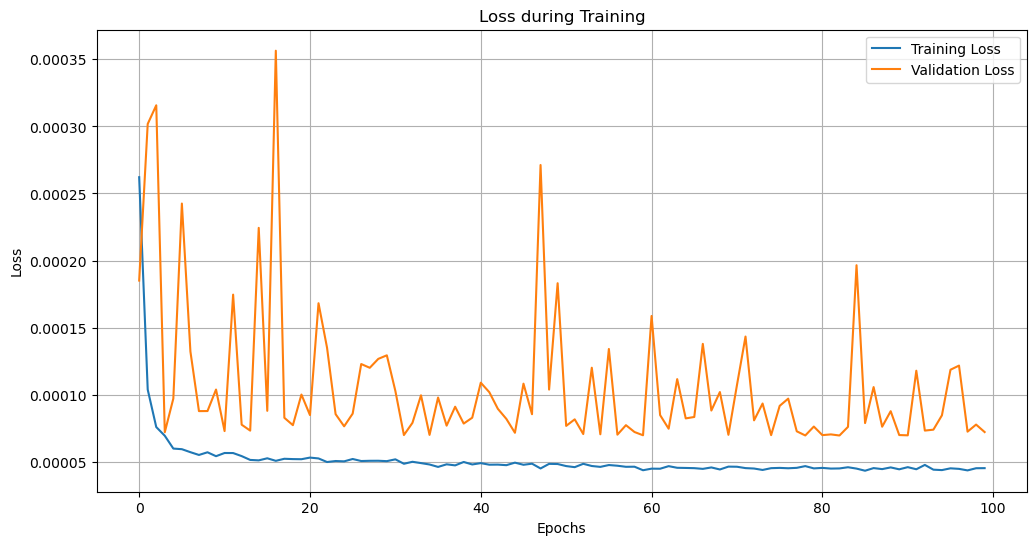

In [6]:
# Vẽ biểu đồ loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Dự đoán trên tập test
predictions = model.predict(X_test)

# Chuyển đổi giá trị dự đoán và thực tế về thang đo ban đầu
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [8]:
# Đánh giá mô hình
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Tính toán các chỉ số
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled) * 100
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
r2 = r2_score(y_test_rescaled, predictions_rescaled)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 66.9204
MAPE: 2.5247%
RMSE: 112.3127
R²: 0.9310


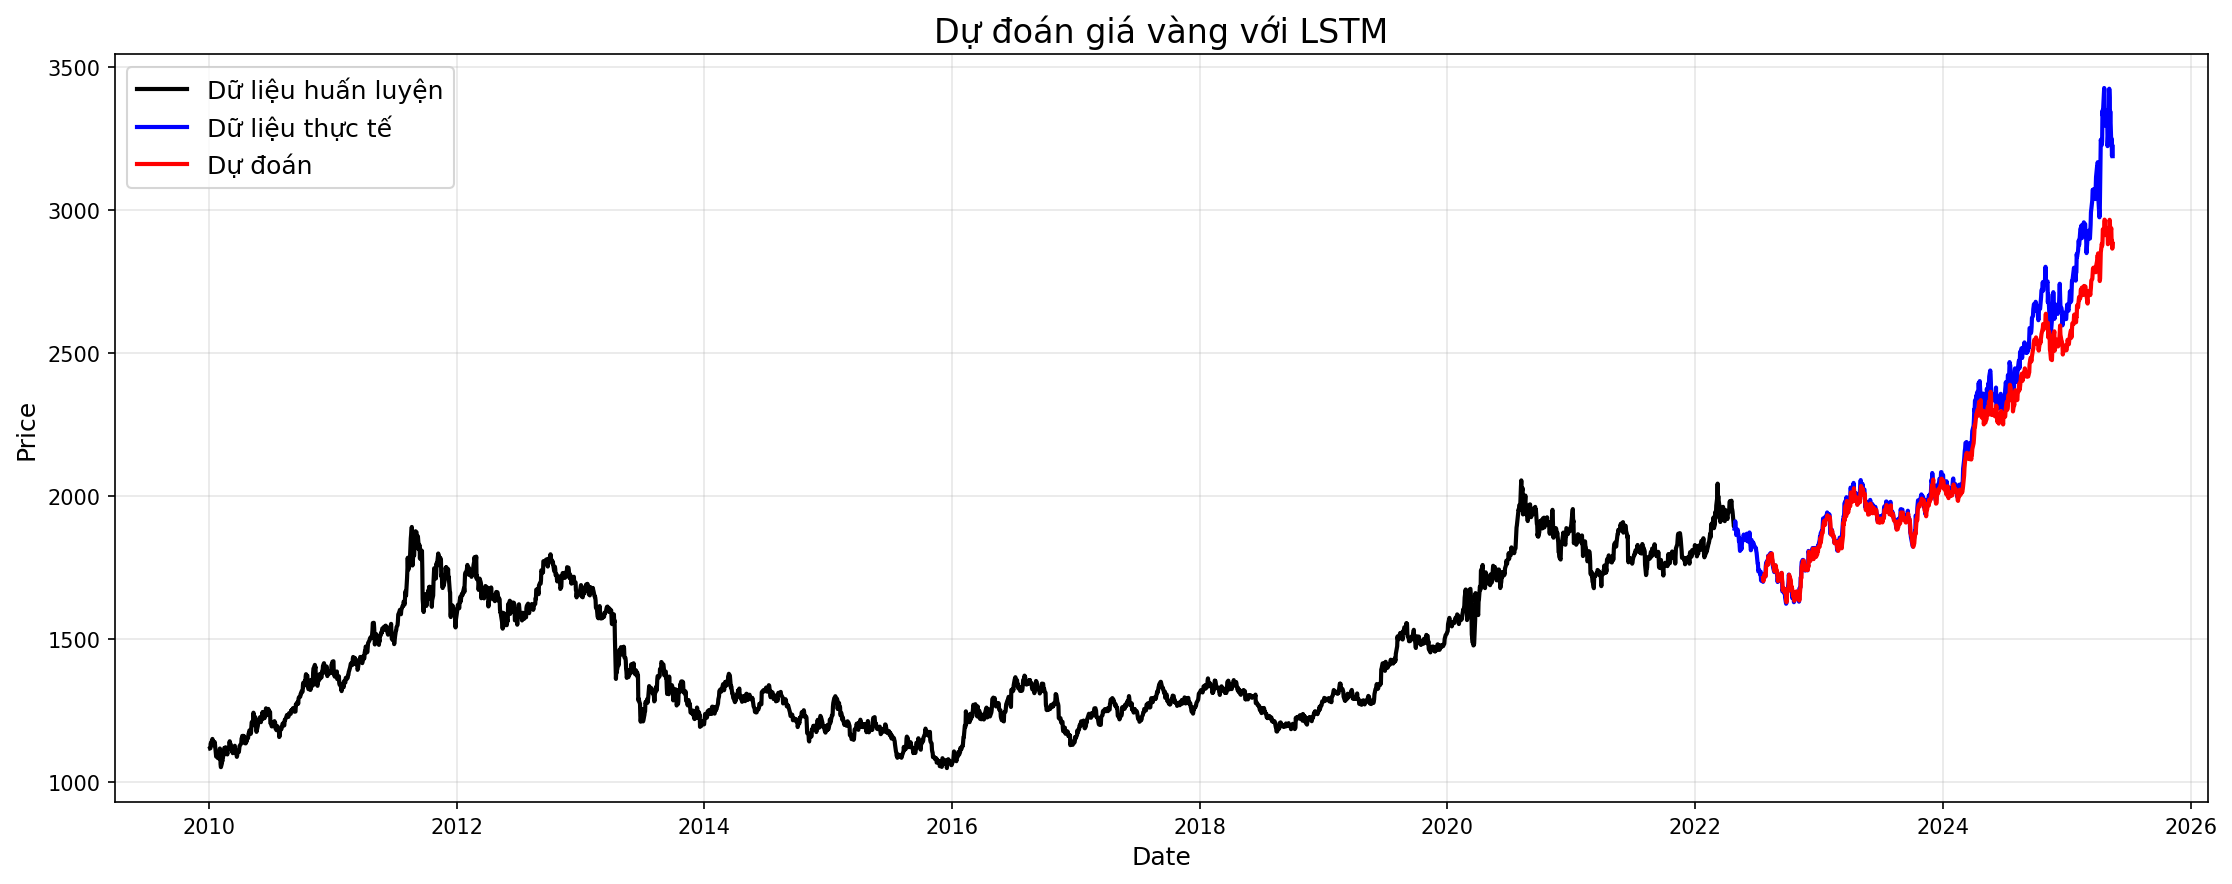

In [9]:
# Vẽ biểu đồ kết quả
plt.figure(figsize=(15, 6), dpi=150)

# Tạo mảng date cho dữ liệu test (đã có các chỉ mục ngày)
train_dates = df.index[:train_size]
test_dates = df.index[train_size:]

# Vẽ dữ liệu train
train_values = scaler.inverse_transform(train_data.reshape(-1, 1))
plt.plot(train_dates, train_values, color='black', lw=2, label='Dữ liệu huấn luyện')

# Vẽ dữ liệu test thực tế
test_values = scaler.inverse_transform(test_data.reshape(-1, 1))
plt.plot(test_dates[:len(test_values)], test_values, color='blue', lw=2, label='Dữ liệu thực tế')

# Vẽ dữ liệu dự đoán (cần điều chỉnh ngày)
test_dates_pred = test_dates[time_step:len(test_dates)]
plt.plot(test_dates_pred[:len(predictions_rescaled)], predictions_rescaled, color='red', lw=2, label='Dự đoán')

plt.title('Dự đoán giá vàng với LSTM', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
